In [2]:
import pandas as pd
import numpy as np 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Classification (KNN) -- Iris Dataset

In [4]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

In [6]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


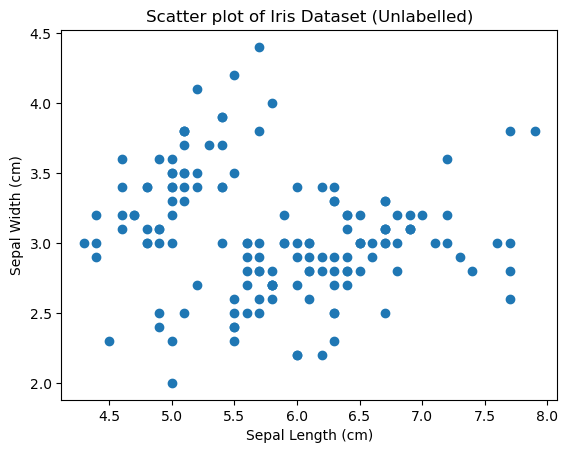

In [8]:
#sepal length and sepal width
plt.scatter(data1["sepal length (cm)"], data1["sepal width (cm)"])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Scatter plot of Iris Dataset (Unlabelled)");

What patterns are we seeing at this point? Which clusters might be ideal?

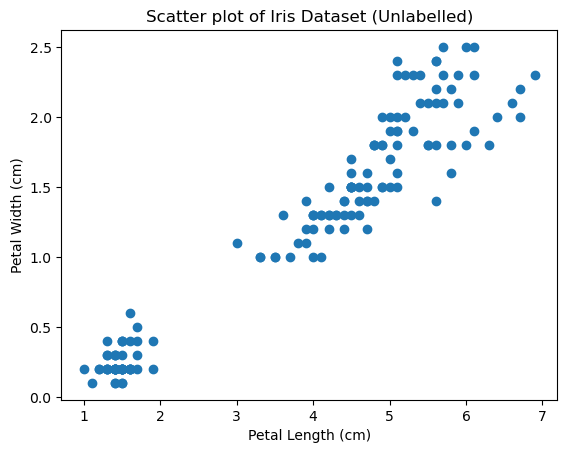

In [10]:
#petal length and petal width
plt.scatter(data1["petal length (cm)"], data1["petal width (cm)"])
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Scatter plot of Iris Dataset (Unlabelled)");

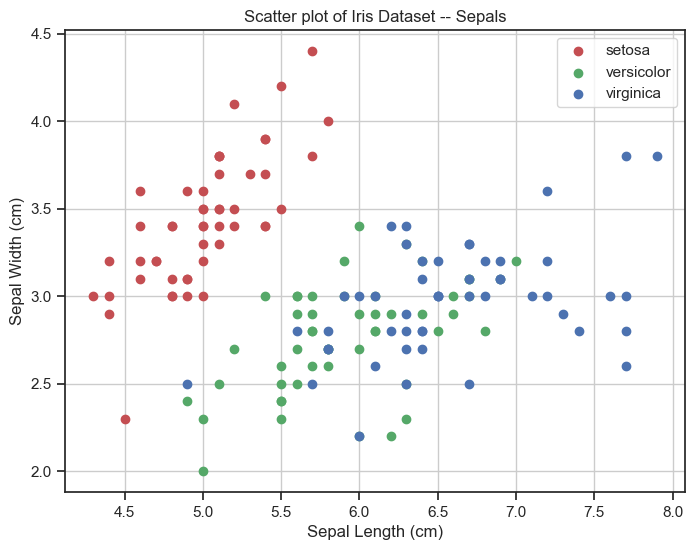

In [12]:
# Plotting the categories
sns.set(style="ticks")
plt.figure(figsize=(8, 6))

# Plotting sepal length vs sepal width
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', label=iris.target_names[0])
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', label=iris.target_names[1])
plt.scatter(X[y == 2, 0], X[y == 2, 1], c='b', label=iris.target_names[2])

plt.title('Scatter plot of Iris Dataset -- Sepals')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()

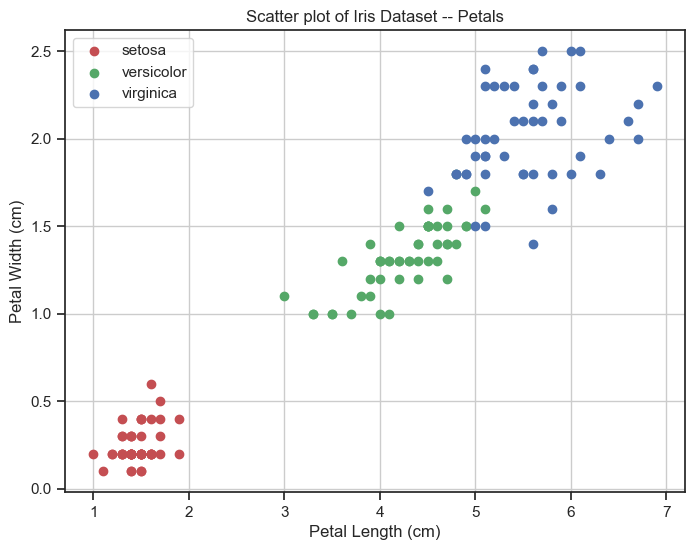

In [14]:
# Plotting the categories
sns.set(style="ticks")
plt.figure(figsize=(8, 6))

# Plotting petal length vs petal width
plt.scatter(X[y == 0, 2], X[y == 0, 3], c='r', label=iris.target_names[0])
plt.scatter(X[y == 1, 2], X[y == 1, 3], c='g', label=iris.target_names[1])
plt.scatter(X[y == 2, 2], X[y == 2, 3], c='b', label=iris.target_names[2])

plt.title('Scatter plot of Iris Dataset -- Petals')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
X #what happens if I change X (features)? 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Making a classifier with only petal features

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:, 2:], y, test_size=0.3)

In [22]:
print(len(X_train))
print(len(X_test))

105
45


In [24]:
# Initialize the classifier (K-nearest neighbors with k=3)
knn = KNeighborsClassifier(n_neighbors=3)

In [26]:
# Train the classifier with the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the KNN model: {accuracy:.2f}')

Accuracy of the KNN model: 0.96


### Making a classifier with only sepal features

In [28]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X[:, :2], y, test_size=0.3)

In [30]:
knn2 = KNeighborsClassifier(n_neighbors=3)

In [32]:
# Train the classifier with the training data
knn2.fit(X_train2, y_train2)

# Predict on the test data
y_pred2 = knn2.predict(X_test2)

# Calculate the accuracy of the model
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f'Accuracy of the KNN model: {accuracy2:.2f}')

Accuracy of the KNN model: 0.64


### Making a classifier with all features

In [34]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3)

In [36]:
knn3 = KNeighborsClassifier(n_neighbors=3)

In [38]:
# Train the classifier with the training data
knn3.fit(X_train3, y_train3)

# Predict on the test data
y_pred3 = knn3.predict(X_test3)

# Calculate the accuracy of the model
accuracy3 = accuracy_score(y_test3, y_pred3)
print(f'Accuracy of the KNN model: {accuracy3:.2f}')

Accuracy of the KNN model: 0.93


## Regression (Linear) -- Diabetes Dataset

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data  # Features
y = diabetes.target  # Target variable

In [44]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [46]:
diabetes.feature_names #What do all of these mean? 

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Explanation of each of these feature names can be listed here: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1)

### Feature Selection

In [48]:
diabetes = load_diabetes()

In [50]:
diabetes_df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


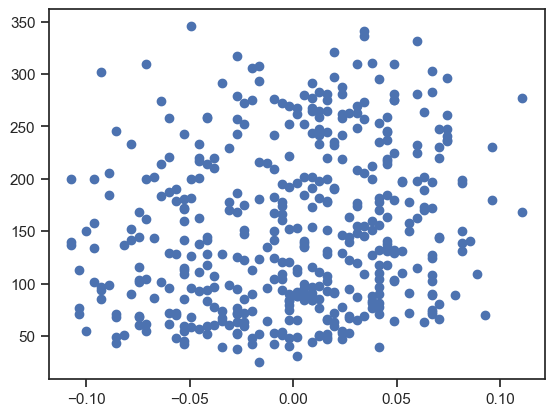

In [52]:
plt.scatter(diabetes_df["age"], diabetes_df["target"])

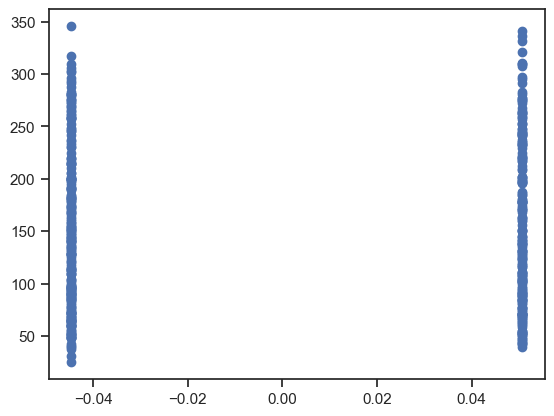

In [54]:
plt.scatter(diabetes_df["sex"], diabetes_df["target"])

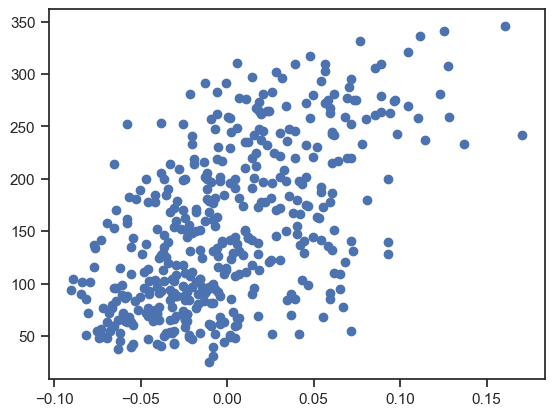

In [56]:
plt.scatter(diabetes_df["bmi"], diabetes_df["target"])

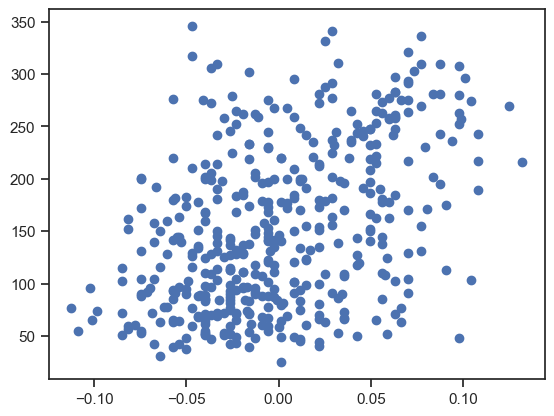

In [58]:
plt.scatter(diabetes_df["bp"], diabetes_df["target"])

... this could be one way to choose features

We can also make a features selection chart!

In [60]:
diabetes_df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


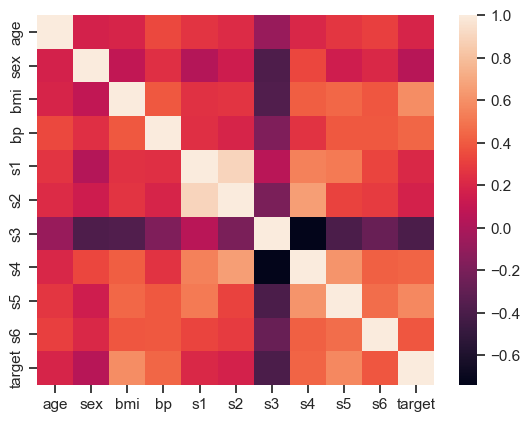

In [62]:
sns.heatmap(diabetes_df.corr());

### Using all features

In [64]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [66]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

In [68]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 2873.66
R-squared (R2): 0.55


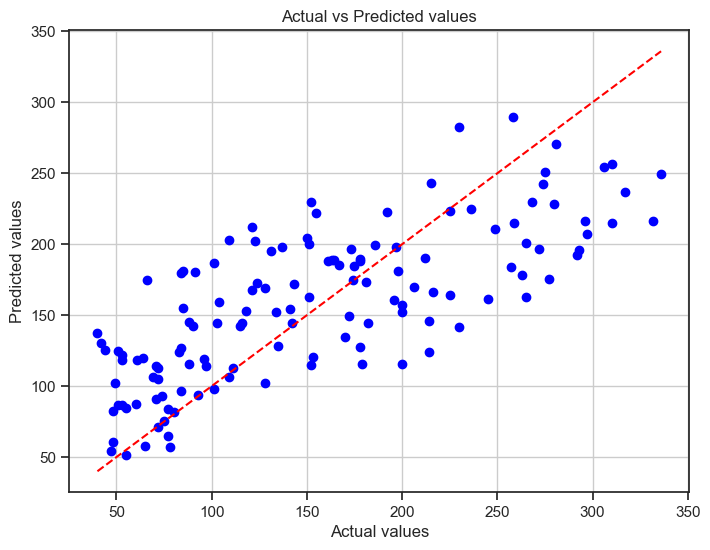

In [70]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.grid(True)
plt.show()

## Using only the top 5 most correlated features

Top 5: bmi, s5, bp, s4, s3

In [72]:
diabetes_df_5 = diabetes_df[["bmi", "s5", "bp", "s4", "s3", "target"]]
diabetes_df_5

,bmi,s5,bp,s4,s3,target
0,0.061696,0.019907,0.021872,-0.002592,-0.043401,151.0
1,-0.051474,-0.068332,-0.026328,-0.039493,0.074412,75.0
2,0.044451,0.002861,-0.005670,-0.002592,-0.032356,141.0
3,-0.011595,0.022688,-0.036656,0.034309,-0.036038,206.0
4,-0.036385,-0.031988,0.021872,-0.002592,0.008142,135.0
...,...,...,...,...,...,...
437,0.019662,0.031193,0.059744,-0.002592,-0.028674,178.0
438,-0.015906,-0.018114,-0.067642,0.034309,-0.028674,104.0
439,-0.015906,-0.046883,0.017293,-0.011080,-0.024993,132.0
440,0.039062,0.044529,0.001215,0.026560,-0.028674,220.0


In [74]:
X_2 = diabetes_df_5.iloc[:, :5].to_numpy()
X_2

array([[ 0.06169621,  0.01990749,  0.02187239, -0.00259226, -0.04340085],
       [-0.05147406, -0.06833155, -0.02632753, -0.03949338,  0.07441156],
       [ 0.04445121,  0.00286131, -0.00567042, -0.00259226, -0.03235593],
       ...,
       [-0.01590626, -0.04688253,  0.01729339, -0.01107952, -0.02499266],
       [ 0.03906215,  0.04452873,  0.00121528,  0.02655962, -0.02867429],
       [-0.0730303 , -0.00422151, -0.08141314, -0.03949338,  0.17381578]])

In [76]:
y_2 = diabetes_df_5["target"].to_numpy()
y_2

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [78]:
# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.3)

In [80]:
# Initialize the linear regression model
model2 = LinearRegression()

# Train the model
model2.fit(X_train2, y_train2)

# Predict on the test data
y_pred2 = model2.predict(X_test2)

In [84]:
# Calculate metrics
mse2 = mean_squared_error(y_test2, y_pred2)
r2_2 = r2_score(y_test2, y_pred2)
print(f'Mean Squared Error (MSE): {mse2:.2f}')
print(f'R-squared (R2): {r2_2:.2f}')

Mean Squared Error (MSE): 3135.35
R-squared (R2): 0.47


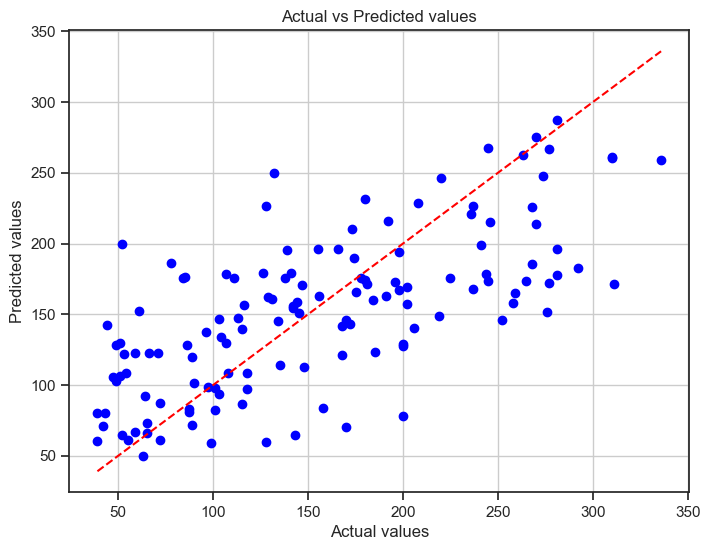

In [86]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test2, y_pred2, color='blue')
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], linestyle='--', color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.grid(True)
plt.show()